In [1]:
import pandas as pd
from pathlib import Path
import json

In [14]:
results_dir = Path("../results").resolve()
exp_name = "100M_samples_expansion_50_zipf"
grammar_names = [
    "PCFG",
    "PCFGDeterministicShuffle",
    "PCFGNonDeterministicShuffle",
    "PCFGLocalShuffle",
    "PCFGEvenOddShuffle",
    "PCFGNoReverse",
    "PCFGPartialReverse",
    "PCFGFullReverse",
]

results = []
for grammar_name in grammar_names:
    with open(
        results_dir / f"{exp_name}" / f"{grammar_name}" / "results.json", "r"
    ) as f:
        result = json.load(f)
    results.append(
        {
            "grammar_name": grammar_name,
            "Entropy": result["Entropy"],
        }
    )

results_df = pd.DataFrame(results)
results_df["Delta from Base Entropy"] = (
    results_df["Entropy"]
    - results_df[results_df["grammar_name"] == "PCFG"]["Entropy"].values[0]
)
results_df["Perplexity"] = (2 ** results_df["Entropy"]).round(1)
results_df["Delta from Base Perplexity"] = (
    results_df["Perplexity"]
    - results_df[results_df["grammar_name"] == "PCFG"]["Perplexity"].values[0]
)

In [15]:
results_df

,grammar_name,Entropy,Delta from Base Entropy,Perplexity,Delta from Base Perplexity
0,PCFG,23.371211,0.000000,10850143.4,0.0
1,PCFGDeterministicShuffle,23.371773,0.000562,10854369.5,4226.1
2,PCFGNonDeterministicShuffle,24.653882,1.282671,26397211.2,15547067.8
3,PCFGLocalShuffle,23.371441,0.000230,10851876.7,1733.3
4,PCFGEvenOddShuffle,23.371453,0.000242,10851966.9,1823.5
5,PCFGNoReverse,24.176657,0.805447,18962652.7,8112509.3
6,PCFGPartialReverse,24.177561,0.806350,18974531.1,8124387.7
7,PCFGFullReverse,24.177421,0.806210,18972688.7,8122545.3


/tmp/ipykernel_1365498/971959391.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['grammar_name'], rotation=45, ha='right')
/tmp/ipykernel_1365498/971959391.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(results_df['grammar_name'], rotation=45, ha='right')


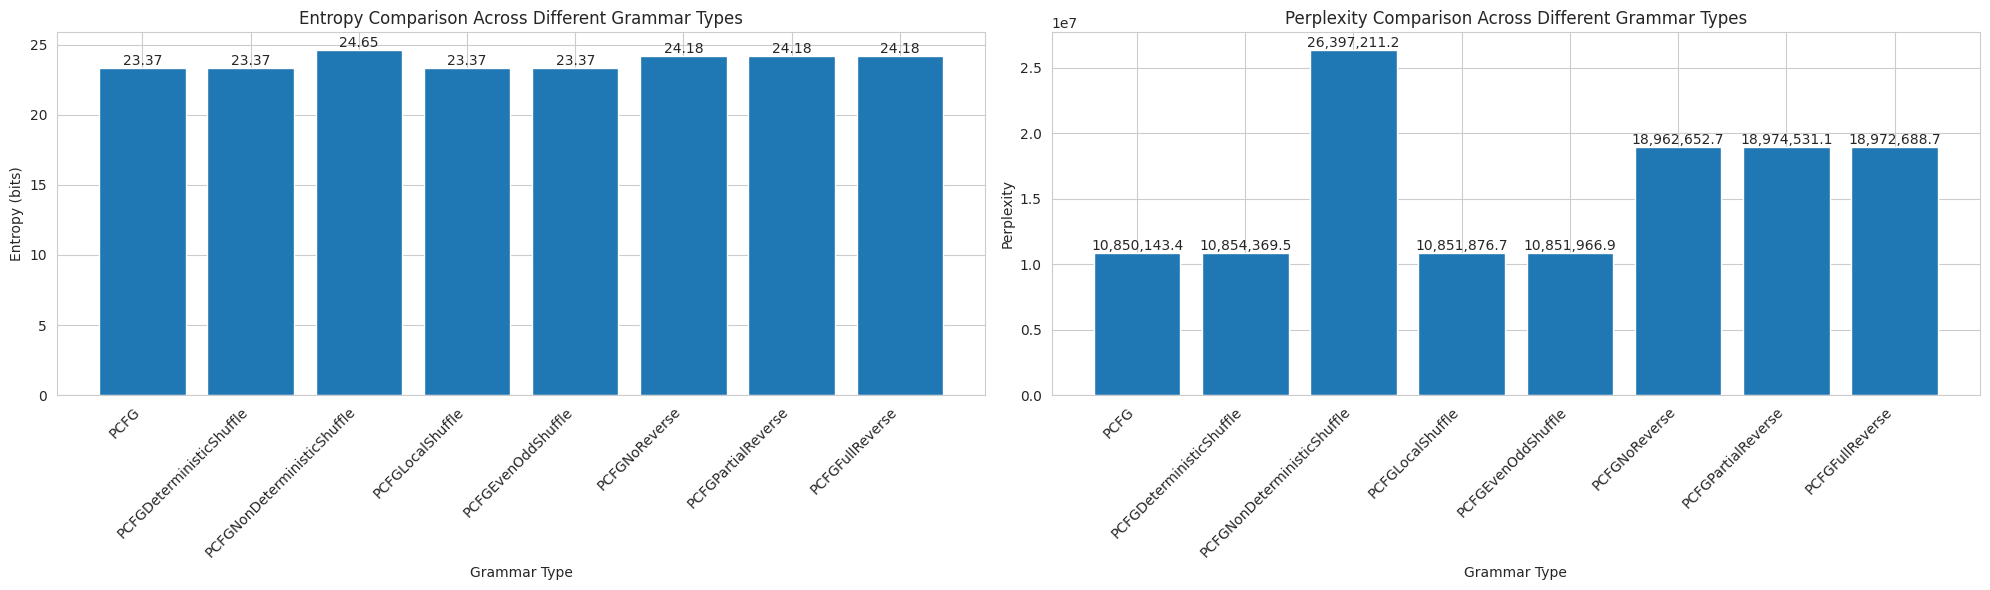

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# プロットの設定
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style("whitegrid")

# Entropyのプロット
bars1 = ax1.bar(results_df["grammar_name"], results_df["Entropy"])
ax1.set_xticklabels(results_df["grammar_name"], rotation=45, ha="right")
ax1.set_xlabel("Grammar Type")
ax1.set_ylabel("Entropy (bits)")
ax1.set_title("Entropy Comparison Across Different Grammar Types")

# Entropyの値を表示
for bar in bars1:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
    )

# Perplexityのプロット
bars2 = ax2.bar(results_df["grammar_name"], results_df["Perplexity"])
ax2.set_xticklabels(results_df["grammar_name"], rotation=45, ha="right")
ax2.set_xlabel("Grammar Type")
ax2.set_ylabel("Perplexity")
ax2.set_title("Perplexity Comparison Across Different Grammar Types")

# Perplexityの値を表示
for bar in bars2:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:,.1f}",
        ha="center",
        va="bottom",
    )

# レイアウトの調整
plt.tight_layout()

# プロットの表示
plt.show()